# 데이터 탐색(전처리)

### 목차
* 상관계수 확인하기
* kaggle의 world happiness report의 데이터 전처리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#describe()사용해보기   => 관련성 잘 드러나지 않음
Korean = [90, 95, 85, 80, 75, 80, 75, 70, 65, 65]
English = [95, 90, 85, 80, 85, 70, 70, 60, 65, 55]
Math = [95, 85, 80, 70 ,60, 70, 85, 80, 95, 45]
scores = pd.DataFrame({'korean' : Korean, 'english' : English, 'math': Math})
scores.describe()

,korean,english,math
count,10.000000,10.000000,10.0000
mean,78.000000,75.500000,76.5000
std,10.055402,13.426756,15.6436
min,65.000000,55.000000,45.0000
25%,71.250000,66.250000,70.0000
50%,77.500000,75.000000,80.0000
75%,83.750000,85.000000,85.0000
max,95.000000,95.000000,95.0000


* corr()메소드를 통해 상관계수 값 확인

In [4]:
print(scores.corr())

           korean   english      math
korean   1.000000  0.872354  0.374367
english  0.872354  1.000000  0.379552
math     0.374367  0.379552  1.000000


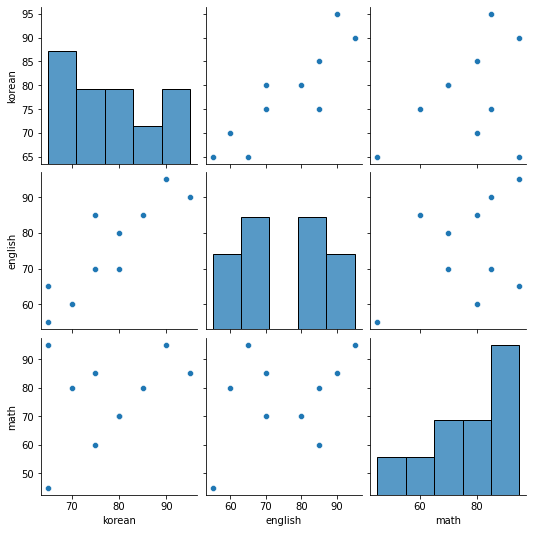

In [5]:
#pairplot()을 사용하여 데이터 간의 관련성을 시각화
sns.pairplot(data = scores)
plt.show()

## kaggle: World Happiness Report 2022

In [11]:
whr = pd.read_csv(r'./World Happiness Report 2022.csv')
data = whr.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [13]:
#불필요한 항목 제거
data2 = data.drop(['Whisker-high', 'Whisker-low'], axis = 1)

In [14]:
#컬럼 이름을 간단하게 변경하기
data2.columns = ['rank', 'country', 'happy_score', 'residual', 'gdp', 
                'social_support', 'health', 'freedom', 'generosity', 'trust']
print(data2)
print(data2.duplicated().sum())    #중복데이터 체크
print(data2.isnull().sum())        #결측 데이터 체크

     rank      country  happy_score  residual    gdp  social_support  health  \
0       1      Finland        7.821     2.518  1.892           1.258   0.775   
1       2      Denmark        7.636     2.226  1.953           1.243   0.777   
2       3      Iceland        7.557     2.320  1.936           1.320   0.803   
3       4  Switzerland        7.512     2.153  2.026           1.226   0.822   
4       5  Netherlands        7.415     2.137  1.945           1.206   0.787   
..    ...          ...          ...       ...    ...             ...     ...   
141   142    Botswana*        3.471     0.187  1.503           0.815   0.280   
142   143      Rwanda*        3.268     0.536  0.785           0.133   0.462   
143   144     Zimbabwe        2.995     0.548  0.947           0.690   0.270   
144   145      Lebanon        2.955     0.216  1.392           0.498   0.631   
145   146  Afghanistan        2.404     1.263  0.758           0.000   0.289   

     freedom  generosity  trust  
0    

In [15]:
#행복지수 값으로 정렬
data3 = data2.sort_values('happy_score', ascending=False)
#행복지수 상위 10개국
print(data3.head(10))
#행복지수 하위 10개국
print(data3.head(10))

   rank      country  happy_score  residual    gdp  social_support  health  \
0     1      Finland        7.821     2.518  1.892           1.258   0.775   
1     2      Denmark        7.636     2.226  1.953           1.243   0.777   
2     3      Iceland        7.557     2.320  1.936           1.320   0.803   
3     4  Switzerland        7.512     2.153  2.026           1.226   0.822   
4     5  Netherlands        7.415     2.137  1.945           1.206   0.787   
5     6  Luxembourg*        7.404     2.042  2.209           1.155   0.790   
6     7       Sweden        7.384     2.003  1.920           1.204   0.803   
7     8       Norway        7.365     1.925  1.997           1.239   0.786   
8     9       Israel        7.364     2.634  1.826           1.221   0.818   
9    10  New Zealand        7.200     1.954  1.852           1.235   0.752   

   freedom  generosity  trust  
0    0.736       0.109  0.534  
1    0.719       0.188  0.532  
2    0.718       0.270  0.191  
3    0.677   

In [16]:
#rank 및 country 열 제거
data3.drop(['rank', 'country'], axis = 1, inplace = True)

print(data3.head(10).mean())
print()
print(data3.tail(10).mean())
print()

#행복지수 상위 & 하위 국가 비교
print(data3.head(10).mean()/data3.tail(10).mean())

happy_score       7.4658
residual          2.1912
gdp               1.9556
social_support    1.2307
health            0.7913
freedom           0.6901
generosity        0.1940
trust             0.4137
dtype: float64

happy_score       3.3391
residual          0.9149
gdp               0.9336
social_support    0.4853
health            0.3324
freedom           0.4010
generosity        0.1345
trust             0.1373
dtype: float64

happy_score       2.235872
residual          2.395016
gdp               2.094687
social_support    2.535957
health            2.380566
freedom           1.720948
generosity        1.442379
trust             3.013110
dtype: float64


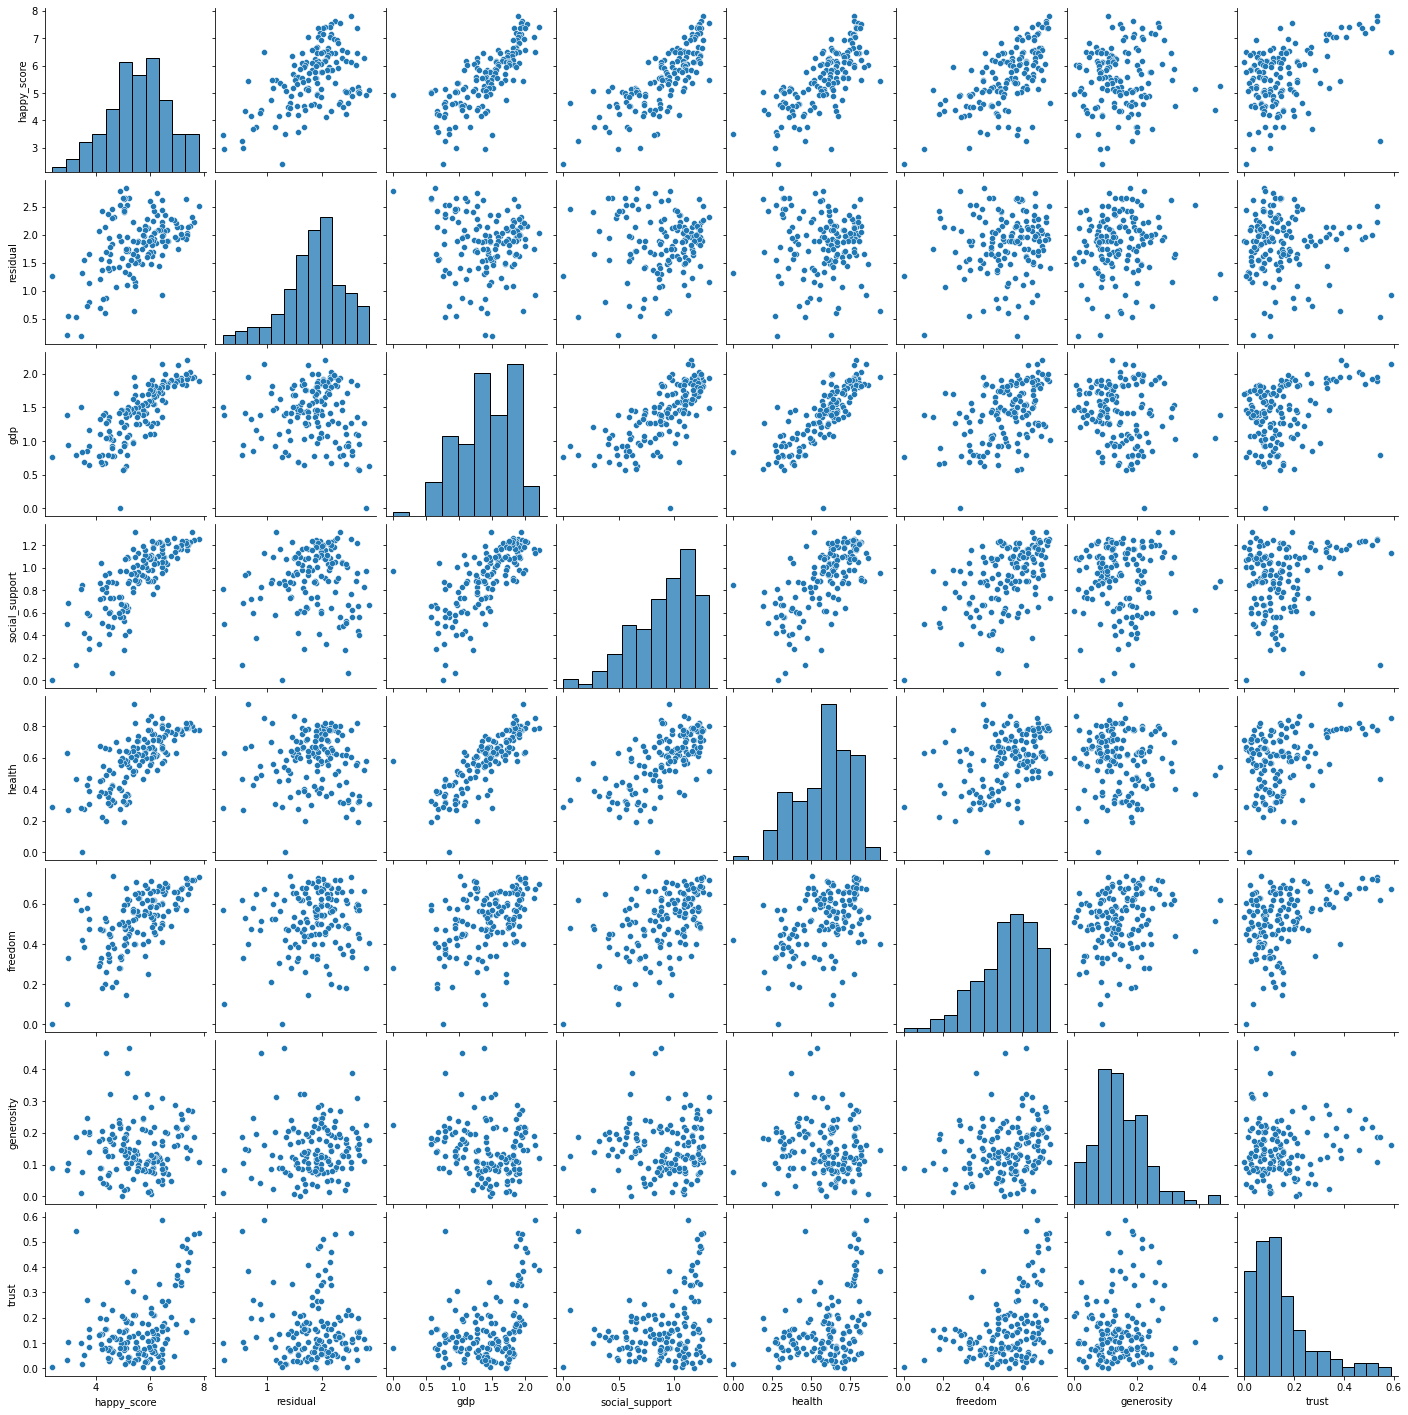

In [17]:
#pairplot():모든 수치형 데이터 간의 산점도 그래프
sns.pairplot(data3)
plt.show()

* 반복문을 사용하여 각 열에 대해 boxplot/ histplot 시각화하기

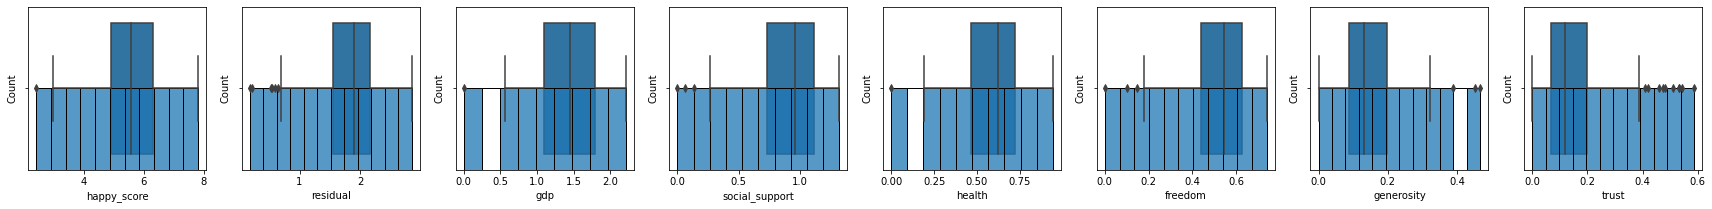

In [20]:
#boxplot으로 시각화하기
'''
for c in data3.columns:
    plt.figure(figsize = (4,3))
    sns.boxplot(x=c, data=data3)
    plt.show()
'''
#histplot으로 시각화하기
'''
for c in data3.columns:
    plt.figure(figsize=(4,3))
    sns.histplot(x=c, data=data3)
    plt.show()
'''
#subplotdmfh 시각화하기
plt.figure(figsize=(30,3))
i=1
for c in data3.columns:
    plt.subplot(1, len(data3.columns), i)
    sns.histplot(x=c, data=data3)
    i+=1
    sns.boxplot(x=c, data=data3)
plt.show()

* 행복지수 값과 다른 데이터간의 산점도 그래프로 관련성을 시각화

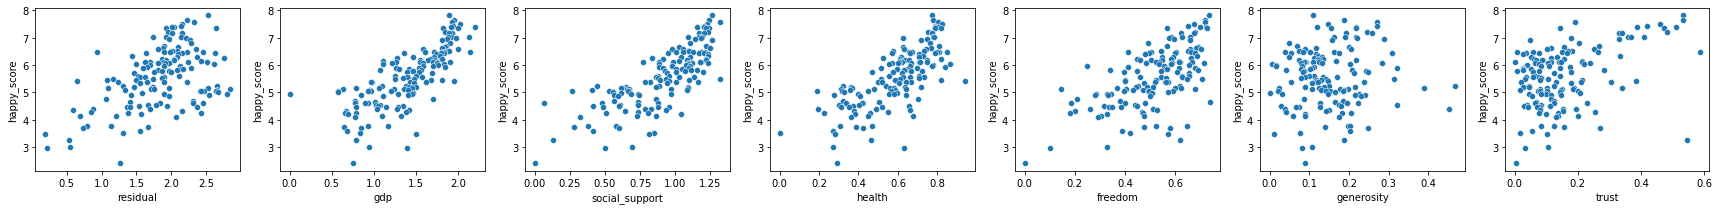

In [21]:
plt.figure(figsize=(30,3))
i=1
for c in data3.columns:
    if c != 'happy_score':
        plt.subplot(1, len(data3.columns)-1, i)
        i += 1
        sns.scatterplot(x=c, y='happy_score', data=data3)
plt.show()

* df.corr메소드 사용 => 상관계수 확인

                happy_score  residual       gdp  social_support    health  \
happy_score        1.000000  0.498990  0.763677        0.777889  0.740260   
residual           0.498990  1.000000 -0.073423        0.083606 -0.006886   
gdp                0.763677 -0.073423  1.000000        0.722421  0.815386   
social_support     0.777889  0.083606  0.722421        1.000000  0.666760   
health             0.740260 -0.006886  0.815386        0.666760  1.000000   
freedom            0.624822  0.117695  0.458591        0.480466  0.433166   
generosity         0.063785  0.066915 -0.164472       -0.002339 -0.098133   
trust              0.416216 -0.051075  0.377589        0.223352  0.362626   

                 freedom  generosity     trust  
happy_score     0.624822    0.063785  0.416216  
residual        0.117695    0.066915 -0.051075  
gdp             0.458591   -0.164472  0.377589  
social_support  0.480466   -0.002339  0.223352  
health          0.433166   -0.098133  0.362626  
freedom     

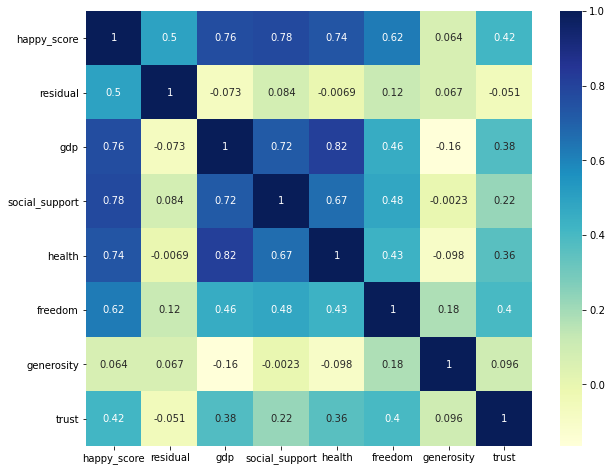

In [22]:
corr_res = data3.corr()
print(corr_res)
plt.figure(figsize=(10,8))
sns.heatmap(corr_res, annot=True, cmap='YlGnBu')
plt.show()

* corr()결과 중 행복지수 것만 가져와서 시각화

happy_score       1.000000
residual          0.498990
gdp               0.763677
social_support    0.777889
health            0.740260
freedom           0.624822
generosity        0.063785
trust             0.416216
Name: happy_score, dtype: float64


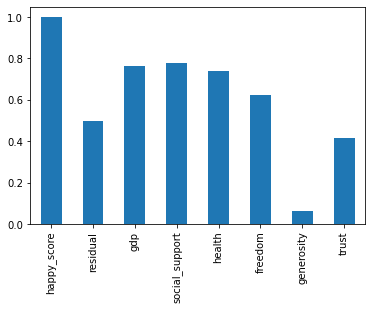

In [23]:
print(corr_res.loc['happy_score'])
corr_res.loc['happy_score'].plot.bar()
plt.show()

* 행복지수 기준으로 상중하 그룹 정보 열을 생성

In [25]:
#행 개수(나라 갯수)
nums = data3.shape[0]
#행복지수로 정렬되어 있으므로 1/3, 2/3지점의 행복지수 값 가져옴
h_border = data3.iloc[int(nums/3)]['happy_score']
m_border = data3.iloc[int(nums/3)*2]['happy_score']
print(h_border, m_border)

6.12 5.122


In [26]:
#행복지수 순위 1/3, 2/3 지점 값으로 상,중,하 국가로 그룹핑
def encoding_group_rank(x):
    if x >= h_border:
        return 'H'
    elif x >= m_border:
        return 'M'
    else:
        return 'L'
data3['group_rank'] = data3['happy_score'].apply(encoding_group_rank)

## * 행복지수 상중하 그룹별 평균을 구하여 비교

In [27]:
data3.groupby('group_rank').mean().sort_values('happy_score', ascending=False)

,happy_score,residual,gdp,social_support,health,freedom,generosity,trust
group_rank,,,,,,,,
H,6.711204,2.080980,1.789449,1.131143,0.721816,0.612204,0.149531,0.226163
M,5.597313,1.789542,1.428333,0.960167,0.619542,0.535229,0.145750,0.118812
L,4.353102,1.624041,1.013918,0.627388,0.417837,0.404612,0.146816,0.118633


* 그 외 흥미로운 정보

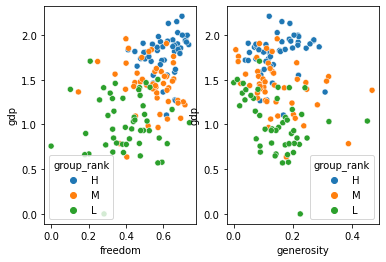

In [28]:
#행복지수 상중하와 함께, GDP와 다른 지표 간의 관련성은?
plt.subplot(1, 2, 1)
sns.scatterplot(x='freedom', y='gdp', hue='group_rank', data=data3)

plt.subplot(1, 2, 2)
sns.scatterplot(x='generosity', y='gdp', hue='group_rank', data=data3)
plt.show()

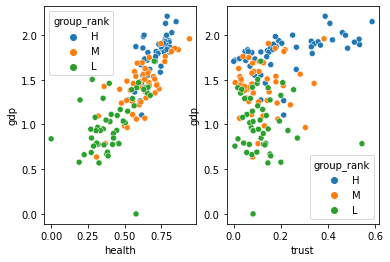

In [29]:
plt.subplot(1, 2, 1)
sns.scatterplot(x='health', y='gdp', hue='group_rank', data=data3)

plt.subplot(1, 2, 2)
sns.scatterplot(x='trust', y='gdp', hue='group_rank', data=data3)
plt.show()